In [1]:
import pandas as pd
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
data = pd.read_csv('/Users/jangjinseul/Desktop/SKN13/08_Î®∏Ïã†Îü¨Îãù/datasets/2010-new-york-state-hospital-inpatient-discharge/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')
data.head(10)
print(data.shape)
# 1. Î¨∏ÏûêÏó¥ Îì± ÎπÑÏ†ïÏÉÅÏ†ÅÏù∏ Í∞íÏùÄ NaNÏúºÎ°ú Î≥ÄÌôò
data['Length of Stay'] = pd.to_numeric(data['Length of Stay'], errors='coerce')

# 2. NaNÏù¥ Îêú ÌñâÏùÄ Ï†úÍ±∞
df = data.dropna(subset=['Length of Stay'])

# 3. float ‚Üí int Î°ú ÌòïÎ≥ÄÌôò (NaN Ï†úÍ±∞ÎêòÏóàÏúºÎØÄÎ°ú ÏïàÏ†Ñ)
df['Length of Stay'] = df['Length of Stay'].astype(int)

print(df.shape, df['Length of Stay'].dtype)

# NaN Í∞úÏàò ÎßéÏùÄ Ïª¨Îüº Ï†úÍ±∞
df = df.drop(columns=df.columns[df.isna().sum() > 10_000], errors='ignore')

# ÏùòÎØ∏ ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
df = df.drop(columns=['index', 'Zip Code - 3 digits', 'Attending Provider License Number', 'Operating Certificate Number'], errors='ignore')

# X, y Ï†ïÏùò: Ìá¥Ïõê ÏÉÅÌÉúÎ•º Ïù¥ÌÉà vs ÎπÑÏù¥ÌÉàÎ°ú Íµ¨Î∂Ñ
X = df.drop(columns=['Patient Disposition'])
y = np.where(df['Patient Disposition'] == 'Left Against Medical Advice', 1, 0)


/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_39842/1494730456.py:5: DtypeWarning: Columns (1,2,7,11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/jangjinseul/Desktop/SKN13/08_Î®∏Ïã†Îü¨Îãù/datasets/2010-new-york-state-hospital-inpatient-discharge/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')


(2622133, 38)


/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_39842/1494730456.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length of Stay'] = df['Length of Stay'].astype(int)


(2619918, 38) int64


In [2]:
df.columns

Index(['Health Service Area', 'Hospital County', 'Facility ID',
       'Facility Name', 'Age Group', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Source of Payment 1', 'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [3]:
# Object typeÏù∏ Ïª¨ÎüºÏùò ÏÑ∏Î∂Ä dtype ÌôïÏù∏ > nanÏùÄ float type
# float typeÏùò Í∞úÏàòÏôÄ nan Í∞úÏàòÍ∞Ä Í∞ôÏùå
for col in df.select_dtypes(include='object').columns:
    print(f"Ïª¨Îüº: {col}")
    print(df[col].apply(type).value_counts(), "\n")

Ïª¨Îüº: Health Service Area
Health Service Area
<class 'str'>      2615031
<class 'float'>       4887
Name: count, dtype: int64 

Ïª¨Îüº: Hospital County
Hospital County
<class 'str'>      2615031
<class 'float'>       4887
Name: count, dtype: int64 

Ïª¨Îüº: Facility Name
Facility Name
<class 'str'>    2619918
Name: count, dtype: int64 

Ïª¨Îüº: Age Group
Age Group
<class 'str'>    2619918
Name: count, dtype: int64 

Ïª¨Îüº: Gender
Gender
<class 'str'>    2619918
Name: count, dtype: int64 

Ïª¨Îüº: Race
Race
<class 'str'>    2619918
Name: count, dtype: int64 

Ïª¨Îüº: Ethnicity
Ethnicity
<class 'str'>    2619918
Name: count, dtype: int64 

Ïª¨Îüº: Type of Admission
Type of Admission
<class 'str'>    2619918
Name: count, dtype: int64 

Ïª¨Îüº: Patient Disposition
Patient Disposition
<class 'str'>      2619815
<class 'float'>        103
Name: count, dtype: int64 

Ïª¨Îüº: CCS Diagnosis Description
CCS Diagnosis Description
<class 'str'>      2617645
<class 'float'>       2273
Name: coun

In [4]:
df['Length of Stay']

0           1
1          15
2           3
3           5
4           4
           ..
2622128    29
2622129     1
2622130     4
2622131     1
2622132     1
Name: Length of Stay, Length: 2619918, dtype: int64

In [5]:
# Í≥†Ïú†Í∞í Í∞úÏàò ÌôïÏù∏
df.nunique()

Health Service Area                          8
Hospital County                             57
Facility ID                                225
Facility Name                              225
Age Group                                    5
Gender                                       3
Race                                         4
Ethnicity                                    3
Length of Stay                             119
Type of Admission                            6
Patient Disposition                         19
Discharge Year                               1
CCS Diagnosis Code                         262
CCS Diagnosis Description                  262
CCS Procedure Code                         232
CCS Procedure Description                  232
APR DRG Code                               316
APR DRG Description                        316
APR MDC Code                                26
APR MDC Description                         26
APR Severity of Illness Code                 5
APR Severity 

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Í≥†Ïú†Í∞íÏù¥ Îßå Îã®ÏúÑ Ïù¥ÏÉÅÏùÄ Ïó∞ÏÜçÌòï, ÎÇòÎ®∏ÏßÑ Î≤îÏ£ºÌòï + Birth WeightÎäî Ïó∞ÏÜçÌòï
num_columns = ['Total Charges', 'Total Costs', 'Length of Stay', 'Birth Weight'] # Ïó∞ÏÜçÌòï Ïª¨Îüº
cate_columns = [col for col in df.columns
                if col not in num_columns + ['Patient Disposition']] # Î≤îÏ£ºÌòï Ïª¨Îüº


In [8]:
# ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ïÏùò
num_pipeline = make_pipeline(
    KNNImputer(n_neighbors=5),
    StandardScaler()
)

In [9]:
# Tree based Î™®Îç∏(DecisionTree, RandomForest, XGBoost Îì±) + Support Vector Î™®Îç∏ 
cat_pipeline = make_pipeline( 
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
)
# ÎπÑ Tree based Î™®Îç∏(LogisticRegression Îì±)
cat2_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

# ColumnTransformer
preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cate_columns),
    ('num', num_pipeline, num_columns)
])

preprocessor2 = ColumnTransformer([
    ('cat', cat2_pipeline, cate_columns),
    ('num', num_pipeline, num_columns)
])

pca = PCA(n_components=5)

In [10]:
# Îç∞Ïù¥ÌÑ∞ ÏÖã Î∂ÑÌï† 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, test_size=0.001,
                                                    random_state=42, stratify=y)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def tree_pipeline_modeling(X_train, y_train, max_depth=None):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),  # <- tree Î™®Îç∏Ïö© Ï†ÑÏ≤òÎ¶¨ ÏÇ¨Ïö©
        ('model', DecisionTreeClassifier(max_depth=max_depth, random_state=0))
    ])
    pipeline.fit(X_train, y_train)
    return pipeline

    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    tree.fit(X, y)
    return tree

def pipeline_accuracy(X, y, pipeline, title):
    pred = pipeline.predict(X)
    acc = accuracy_score(y, pred)
    print(f"{title}: {acc:.4f}")

In [33]:
tree1 = tree_pipeline_modeling(X_train, y_train, max_depth=1)
print("max depth: 1")
pipeline_accuracy(X_train, y_train, tree1, "Train set")
pipeline_accuracy(X_test, y_test, tree1, "Test set")

max depth: 1
Train set: 0.9783
Test set: 0.9782


In [34]:
tree2 = tree_pipeline_modeling(X_train, y_train, max_depth=2)
print("max depth: 2")
pipeline_accuracy(X_train, y_train, tree2, "Trainset")
pipeline_accuracy(X_test, y_test, tree2, "Testset")

max depth: 2
Trainset: 0.9848
Testset: 0.9844


In [35]:
tree3 = tree_pipeline_modeling(X_train, y_train, max_depth=3)
print("max depth: 3")
pipeline_accuracy(X_train, y_train, tree2, "Trainset")
pipeline_accuracy(X_test, y_test, tree2, "Testset")

max depth: 3
Trainset: 0.9848
Testset: 0.9844


In [36]:
tree5 = tree_pipeline_modeling(X_train, y_train, max_depth=5)
print("max depth: 5")
pipeline_accuracy(X_train, y_train, tree2, "Trainset")
pipeline_accuracy(X_test, y_test, tree2, "Testset")

max depth: 5
Trainset: 0.9848
Testset: 0.9844


In [26]:
%pip install graphviz


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


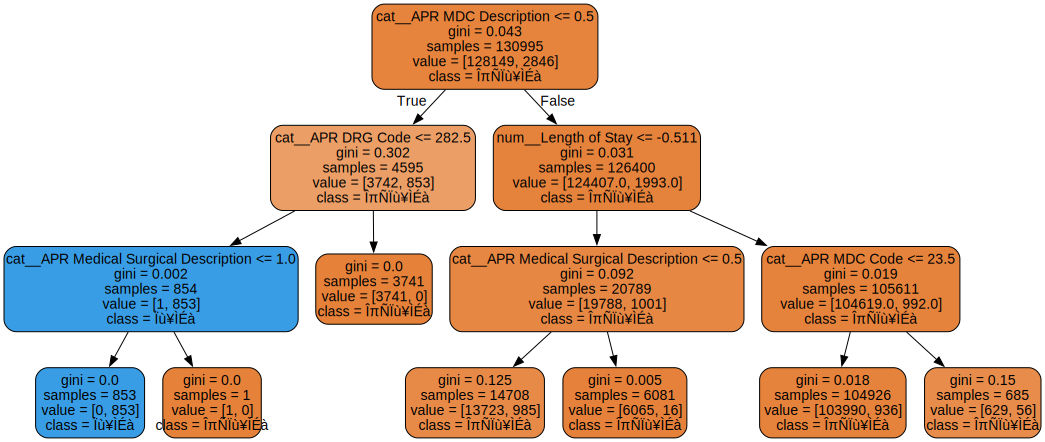

In [37]:
from sklearn.tree import export_graphviz
from graphviz import Source

# ÏãúÍ∞ÅÌôîÏö© ÌååÏù¥ÌîÑÎùºÏù∏ÏóêÏÑú Ïã§Ï†ú Î™®Îç∏ Ï∂îÏ∂ú
tree_model = tree3.named_steps['model']  

# Ï†ÑÏ≤òÎ¶¨ ÌõÑ ÌäπÏÑ± Ïù¥Î¶Ñ Ï∂îÏ∂ú
feature_names = preprocessor.get_feature_names_out()


src = export_graphviz(
    tree_model,
    feature_names=feature_names,
    class_names=['ÎπÑÏù¥ÌÉà', 'Ïù¥ÌÉà'], 
    filled=True,
    rounded=True,
    max_depth=5
)


graph = Source(src)
graph.render("decision_tree", format="png", cleanup=False)  # ÌååÏùºÎ°ú Ï†ÄÏû•ÎèÑ Í∞ÄÎä•
graph


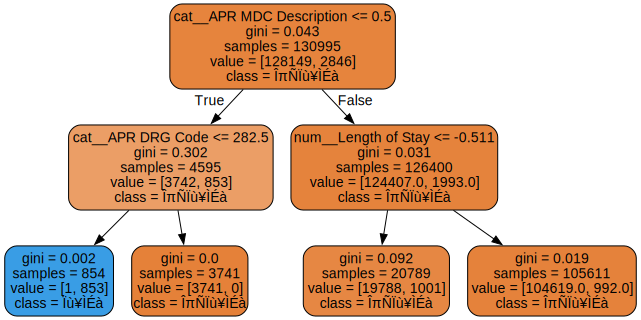

In [40]:
from sklearn.tree import export_graphviz
from graphviz import Source

# 1. ÌååÏù¥ÌîÑÎùºÏù∏ÏóêÏÑú DecisionTreeClassifierÎßå Ï∂îÏ∂ú
tree_model = tree2.named_steps['model']

# 2. Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò Ïã§Ï†ú feature Ïù¥Î¶Ñ Í∞ÄÏ†∏Ïò§Í∏∞
feature_names = tree2.named_steps['preprocessor'].get_feature_names_out()

# 3. export_graphvizÎ°ú dot ÏΩîÎìú ÏÉùÏÑ±
src = export_graphviz(
    decision_tree=tree_model,
    feature_names=feature_names,
    class_names=['ÎπÑÏù¥ÌÉà', 'Ïù¥ÌÉà'],  # 0: ÎπÑÏù¥ÌÉà, 1: Ïù¥ÌÉà
    filled=True,
    rounded=True,
    max_depth=3  # ÏãúÍ∞ÅÌôî Î≤îÏúÑ Ï†úÌïú (ÏÑ†ÌÉù)
)

# 4. graphvizÎ°ú ÏãúÍ∞ÅÌôî
graph = Source(src)
graph

In [ ]:
ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∞æÍ∏∞ 

ÏµúÏ†ÅÏùò max_depth Ï∞æÍ∏∞ 

In [42]:
# max_depth Îäî ÏûëÏùÑ ÏàòÎ°ù Í∑úÏ†úÎ•º Í∞ïÌïòÍ≤å ÌïúÎã§. 
## "Í∑úÏ†úÎ•º Í∞ïÌïòÍ≤å ÌïúÎã§." ÏùòÎØ∏: Î™®Îç∏Ïùò Î≥µÏû°ÎèÑÎ•º ÎÇÆÏ∂îÎäî Î∞©Ìñ•ÏúºÎ°ú ÌïôÏäµÏãúÌÇ§Îäî Í≤É.

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ÌõÑÎ≥¥ max_depth Í∞í
max_depth_list = range(1, 11)

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
train_acc_list = []
test_acc_list = []

# Î∞òÎ≥µÌïòÎ©¥ÏÑú max_depthÎ≥Ñ Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
for max_depth in max_depth_list:
    # Ï†ÑÏ≤òÎ¶¨ + Î™®Îç∏ ÌååÏù¥ÌîÑÎùºÏù∏ Íµ¨ÏÑ±
    pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Tree Í∏∞Î∞òÏù¥ÎØÄÎ°ú preprocessor ÏÇ¨Ïö©
        ('model', DecisionTreeClassifier(max_depth=max_depth, random_state=0))
    ])
    
    # ÌïôÏäµ
    pipeline.fit(X_train, y_train)
    
    # ÏòàÏ∏°
    pred_train = pipeline.predict(X_train)
    pred_test = pipeline.predict(X_test)
    
    # Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
    train_acc = accuracy_score(y_train, pred_train)
    test_acc = accuracy_score(y_test, pred_test)

    # Ï†ÄÏû•
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    print(f"max_depth: {max_depth} | Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")


max_depth: 1 | Train Acc: 0.9783, Test Acc: 0.9782
max_depth: 2 | Train Acc: 0.9848, Test Acc: 0.9844
max_depth: 3 | Train Acc: 0.9848, Test Acc: 0.9844
max_depth: 4 | Train Acc: 0.9848, Test Acc: 0.9844
max_depth: 5 | Train Acc: 0.9848, Test Acc: 0.9844
max_depth: 6 | Train Acc: 0.9848, Test Acc: 0.9844
max_depth: 7 | Train Acc: 0.9849, Test Acc: 0.9844
max_depth: 8 | Train Acc: 0.9850, Test Acc: 0.9844
max_depth: 9 | Train Acc: 0.9851, Test Acc: 0.9840
max_depth: 10 | Train Acc: 0.9854, Test Acc: 0.9847


In [43]:
train_acc_list

[0.9782739799228978,
 0.9847780449635483,
 0.984785678842704,
 0.984785678842704,
 0.9847933127218597,
 0.9848009466010154,
 0.9848772853925722,
 0.9849536241841291,
 0.9850834001297759,
 0.9854040230543151]

In [44]:
test_acc_list

[0.9782442748091603,
 0.9843511450381679,
 0.9843511450381679,
 0.9843511450381679,
 0.9843511450381679,
 0.9843511450381679,
 0.9843511450381679,
 0.9843511450381679,
 0.983969465648855,
 0.9847328244274809]

In [46]:
import pandas as pd

result_df = pd.DataFrame({
    "max depth": max_depth_list,
    "train acc": train_acc_list,
    "test acc": test_acc_list
})
result_df

max depth  train acc  test acc
0          1   0.978274  0.978244
1          2   0.984778  0.984351
2          3   0.984786  0.984351
3          4   0.984786  0.984351
4          5   0.984793  0.984351
5          6   0.984801  0.984351
6          7   0.984877  0.984351
7          8   0.984954  0.984351
8          9   0.985083  0.983969
9         10   0.985404  0.984733

/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_39842/1916921570.py:10: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_39842/1916921570.py:10: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_39842/1916921570.py:10: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_39842/1916921570.py:10: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_39842/1916921570.py:10: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipy

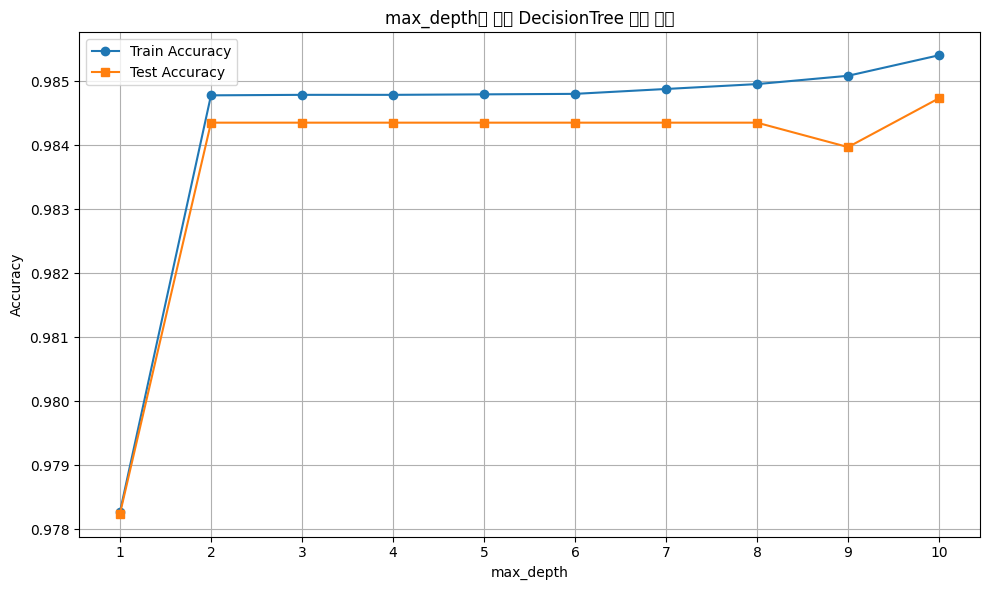

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(max_depth_list, train_acc_list, marker='o', label='Train Accuracy')
plt.plot(max_depth_list, test_acc_list, marker='s', label='Test Accuracy')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("max_depthÏóê Îî∞Î•∏ DecisionTree ÏÑ±Îä• ÎπÑÍµê")
plt.xticks(max_depth_list)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
=========================================================================

In [ ]:
## RandomizedSearchCV



In [50]:
# Îç∞Ïù¥ÌÑ∞ ÏÖã Î∂ÑÌï† 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# 1. ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ïÏùò (Ï†ÑÏ≤òÎ¶¨ + Î™®Îç∏)
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Tree Í∏∞Î∞òÏù¥ÎØÄÎ°ú preprocessor ÏÇ¨Ïö©
    ('model', DecisionTreeClassifier(random_state=0))
])

# 2. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌõÑÎ≥¥ Ï†ïÏùò
params = {
    'model__max_depth': range(1, 11),                      # Ìä∏Î¶¨ ÍπäÏù¥
    'model__max_leaf_nodes': range(10, 100, 5),            # Î¶¨ÌîÑ ÎÖ∏Îìú Ïàò
    'model__max_features': np.arange(0.1, 1.1, 0.1),       # ÏÇ¨Ïö©Ìï† feature ÎπÑÏú®
}

# 3. RandomizedSearchCV Ï†ïÏùò
rs = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=params,
    n_iter=50,                   # ÎûúÎç§ÌïòÍ≤å 50Í∞ú Ï°∞Ìï© ÌÖåÏä§Ìä∏
    scoring='accuracy',         # Ï†ïÌôïÎèÑ Í∏∞Ï§Ä
    cv=4,                        # 4-fold ÍµêÏ∞®Í≤ÄÏ¶ù
    verbose=1,
    random_state=0,
    n_jobs=-1
)

# 4. ÌÉêÏÉâ ÏãúÏûë
rs.fit(X_train, y_train)


Fitting 4 folds for each of 50 candidates, totalling 200 fits


/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
print("best parameter:", rs.best_params_)
print("best score:", rs.best_score_) 

In [ ]:
print("\n‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:")
print(rs.best_params_)

print(f"üìà Best Accuracy (CV ÌèâÍ∑†): {rs.best_score_:.4f}")

# ÏµúÏ†Å Î™®Îç∏ Ï†ÄÏû•
best_dt_pipeline = rs.best_estimator_


In [ ]:
import pandas as pd
rs_result_df = pd.DataFrame(rs.cv_results_)
rs_result_df.sort_values('rank_test_score').head()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_dt = best_dt_pipeline.predict(X_test)

print("\nüìä Test Set ÏÑ±Îä•:")
print(classification_report(y_test, y_pred_dt, target_names=["ÎπÑÏù¥ÌÉà", "Ïù¥ÌÉà"]))

cm = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm, display_labels=["ÎπÑÏù¥ÌÉà", "Ïù¥ÌÉà"]).plot(cmap="Oranges")
plt.title("DecisionTree - ÏµúÏ†Å Î™®Îç∏ ÌòºÎèôÌñâÎ†¨")
plt.show()


In [ ]:
rs_result_df.shape

In [ ]:
# best model ÏùÑ Ïù¥Ïö©Ìï¥ test set ÏµúÏ¢ÖÌèâÍ∞Ä 
best_model = rs.best_estimator_
accuracy_score(y_test, best_model.predict(X_test))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
‚úÖ Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 100}
‚úÖ Best F1 Score : 0.461
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2563
           1       1.00      0.28      0.44        57

    accuracy                           0.98      2620
   macro avg       0.99      0.64      0.72      2620
weighted avg       0.98      0.98      0.98      2620



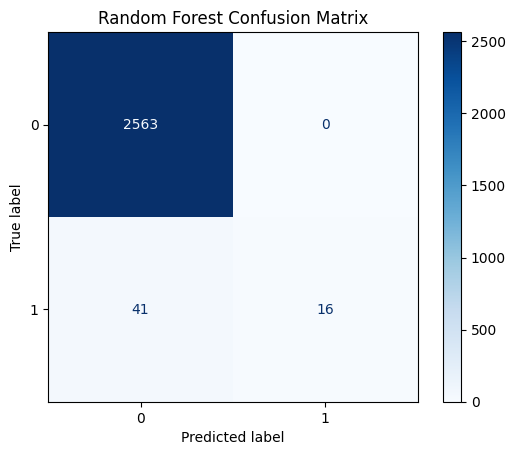

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

params_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10],
    'model__min_samples_split': [2, 5]
}

best_rf, rf_params, rf_score = get_best_model(
    RandomForestClassifier(random_state=0), params_rf, preprocessor, X_train, y_train)

y_pred_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf, zero_division=0))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot(cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

def get_best_model(model, params, preprocessor, X_train, y_train):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    grid = GridSearchCV(pipeline, param_grid=params, scoring='f1', cv=3, verbose=1)
    grid.fit(X_train, y_train)

    print("‚úÖ Best Parameters:", grid.best_params_)
    print("‚úÖ Best F1 Score :", round(grid.best_score_, 4))
    return grid.best_estimator_, grid.best_params_, grid.best_score_


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

def get_best_model(model, params, preprocessor, X_train, y_train):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    grid = RandomizedSearchCV(pipeline, param_grid=params, scoring='f1', cv=3, verbose=1)
    grid.fit(X_train, y_train)

    print("‚úÖ Best Parameters:", grid.best_params_)
    print("‚úÖ Best F1 Score :", round(grid.best_score_, 4))
    return grid.best_estimator_, grid.best_params_, grid.best_score_


In [ ]:
from sklearn.ensemble import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

params_rs = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10],
    'model__min_samples_split': [2, 5]
}

best_rs, rs_params, rs_score = get_best_model(
    RandomizedSearchCV(random_state=0), params_rf, preprocessor, X_train, y_train)

y_pred_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf, zero_division=0))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [ ]:
# feature importances Ï∞æÏïÑÎ≥¥Í∏∞

# PipelineÏóêÏÑú DecisionTreeClassifier Î™®Îç∏ Í∫ºÎÇ¥Í∏∞
tree_model = best_model.named_steps['model']

# Ï†ÑÏ≤òÎ¶¨ Í∞ùÏ≤¥
preprocessor_fitted = best_model.named_steps['preprocessor']

# Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï feature (OrdinalEncoder ÏÇ¨Ïö© ‚Üí feature Ïù¥Î¶Ñ Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ)
cat_features = preprocessor_fitted.transformers_[0][2]

# ÏàòÏπòÌòï feature
num_features = preprocessor_fitted.transformers_[1][2]

# Ï†ÑÏ≤¥ feature ÏàúÏÑú Ï†ïÎ¶¨
feature_names = list(cat_features) + list(num_features)

import pandas as pd

# Ï§ëÏöîÎèÑ ÏãúÎ¶¨Ï¶à ÏÉùÏÑ± Î∞è Ï†ïÎ†¨
importances = pd.Series(tree_model.feature_importances_, index=feature_names)
importances = importances.sort_values(ascending=False)

# ÏÉÅÏúÑ 20Í∞ú Ï∂úÎ†•
print(importances.head(20))


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
importances.head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances (Decision Tree)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÏÖã Î∂ÑÌï† 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)